In [3]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score
#Data Handling: Load dataset (CSV file)
df = pd.read_csv("creditcard.csv")
#List of features, data shape, statical description
print("\nDimension")
print(df.shape)

print("\nFirst Five Lines ")
print(df.head(5))


Dimension
(284807, 31)

First Five Lines 
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

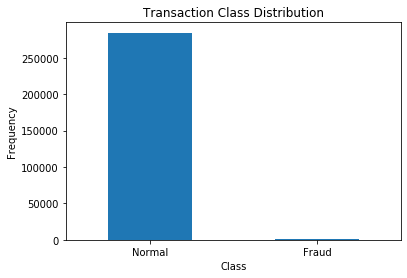

In [6]:
count_class = df['Class'].value_counts(sort = True)
count_class.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
labels = ["Normal","Fraud"]
plt.xticks(range(2),labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [5]:
#Normalization
#scaler = StandardScaler()
#df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [7]:
fraud = df[df['Class'] == 1] # Number of fraudulent transactions
valid = df[df['Class'] == 0] # Number of valid transactions
outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)

0.0017304750013189597


In [8]:
#df1 = df
#columns = df1.columns.tolist()
#columns = [c for c in columns if c not in ["Class"]]
#target = "Class"
state = np.random.RandomState(42)
X = df.drop(['Class'],axis=1) # X is input
y = df['Class'] # y is output
print(X.shape)
print(y.shape)
X_data = X.values
y_data = y.values

(284807, 30)
(284807,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

In [10]:
#Building another model/classifier ISOLATION FOREST
from sklearn.ensemble import IsolationForest
ifc=IsolationForest(max_samples=len(X_train),contamination=outlier_fraction,random_state=1)
ifc.fit(X_train)
scores_pred = ifc.decision_function(X_train)
y_pred = ifc.predict(X_test)

In [11]:
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y_test).sum()
print("\nErrors: ",n_errors)


Errors:  117


[[56812    52]
 [   65    33]]


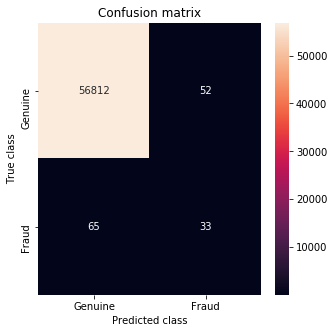

In [12]:
#printing the confusion matrix
LABELS = ['Genuine', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [13]:
#evaluation of the model
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
print('The Model used is {}'.format('Isolation Forest'))
acc= accuracy_score(y_test,y_pred)
print('The accuracy is {}'.format(acc))
prec= precision_score(y_test,y_pred)
print('The precision is {}'.format(prec))
rec= recall_score(y_test,y_pred)
print('The recall is {}'.format(rec))
f1= f1_score(y_test,y_pred)
print('The F1-Score is {}'.format(f1))

The Model used is Isolation Forest
The accuracy is 0.9979459990871107
The precision is 0.38823529411764707
The recall is 0.336734693877551
The F1-Score is 0.36065573770491804


In [14]:
TN = conf_matrix[0,0]
FP = conf_matrix[0,1] 
FN = conf_matrix[1,0]
TP = conf_matrix[1,1]
recall = TP/(TP+FN)
precision = TP/(TP+FP)
print(recall)
print(precision)

0.336734693877551
0.38823529411764707


In [13]:
'''#Only X & Y
model = IsolationForest(n_estimators=100,max_samples = len(X),contamination = outlier_fraction,random_state=state,verbose=0).fit(X) # Fitting the model.
y_prediction2 = model.predict(X) # Prediction using trained model.
y_prediction2[y_prediction2 == 1] = 0 # Valid transactions are labelled as 0.
y_prediction2[y_prediction2 == -1] = 1 # Fraudulent transactions are labelled as 1.
error = (y_prediction2 != y).sum() # Total number of errors is calculated.
print("ISOLATION FOREST")
print("\nError Count: ",error)
print("\nAccuracy Score: ",accuracy_score(y_prediction2,y))
print("\nRecall Score: ",recall_score(y_prediction2,y))
print("\nPrecision Score: ",precision_score(y_prediction2,y))
print("\nF1 Score: ", f1_score(y_prediction2,y))
#print(classification_report(y_prediction2,y))

labels =['Genuine','Fraud']
conf_matrix = confusion_matrix(y_prediction2,y)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,xticklabels= labels, yticklabels= labels, annot=True,fmt='d')
plt.title("Isolation Forest - Confusion Matrix")
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()'''

'#Only X & Y\nmodel = IsolationForest(n_estimators=100,max_samples = len(X),contamination = outlier_fraction,random_state=state,verbose=0).fit(X) # Fitting the model.\ny_prediction2 = model.predict(X) # Prediction using trained model.\ny_prediction2[y_prediction2 == 1] = 0 # Valid transactions are labelled as 0.\ny_prediction2[y_prediction2 == -1] = 1 # Fraudulent transactions are labelled as 1.\nerror = (y_prediction2 != y).sum() # Total number of errors is calculated.\nprint("ISOLATION FOREST")\nprint("\nError Count: ",error)\nprint("\nAccuracy Score: ",accuracy_score(y_prediction2,y))\nprint("\nRecall Score: ",recall_score(y_prediction2,y))\nprint("\nPrecision Score: ",precision_score(y_prediction2,y))\nprint("\nF1 Score: ", f1_score(y_prediction2,y))\n#print(classification_report(y_prediction2,y))\n\nlabels =[\'Genuine\',\'Fraud\']\nconf_matrix = confusion_matrix(y_prediction2,y)\nplt.figure(figsize=(5,5))\nsns.heatmap(conf_matrix,xticklabels= labels, yticklabels= labels, annot=Tru

RESAMPLING TECHNIQUES
--

RANDOM UNDERSAMPLING TECHNIQUE
--

In [14]:
#pip install imblearn

In [15]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

In [16]:
# Split BEFORE any sampling - prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,shuffle=True, random_state=42)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (227845, 30)
y_train -  (227845,)
X_test -  (56962, 30)
y_test -  (56962,)


In [17]:
# Undersampling only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

rus = RandomUnderSampler(random_state=random_state)
X_res, y_res = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 394, 1: 394})
X_train -  (788, 30)
y_train -  (788,)
X_test -  (56962, 30)
y_test -  (56962,)


In [108]:
'''b = IsolationForest(max_samples = len(X_train),contamination = outlier_fraction).fit(X_train) # Fitting the model.
y_prediction2 = b.predict(X_test) 
y_prediction2[y_prediction2 == 1] = 0 
y_prediction2[y_prediction2 == -1] = 1
errors2 = (y_prediction2 != y_test).sum()
print(errors2)
print(confusion_matrix(y_test,y_prediction2))
print(accuracy_score(y_prediction2,y_test))
prec= precision_score(y_test,y_prediction2)
print('The precision is {}'.format(prec))
rec= recall_score(y_test,y_prediction2)
print('The recall is {}'.format(rec))
f1= f1_score(y_test,y_prediction2)
print('The F1-Score is {}'.format(f1))
print(classification_report(y_prediction2,y_test))'''

"b = IsolationForest(max_samples = len(X_train),contamination = outlier_fraction).fit(X_train) # Fitting the model.\ny_prediction2 = b.predict(X_test) \ny_prediction2[y_prediction2 == 1] = 0 \ny_prediction2[y_prediction2 == -1] = 1\nerrors2 = (y_prediction2 != y_test).sum()\nprint(errors2)\nprint(confusion_matrix(y_test,y_prediction2))\nprint(accuracy_score(y_prediction2,y_test))\nprec= precision_score(y_test,y_prediction2)\nprint('The precision is {}'.format(prec))\nrec= recall_score(y_test,y_prediction2)\nprint('The recall is {}'.format(rec))\nf1= f1_score(y_test,y_prediction2)\nprint('The F1-Score is {}'.format(f1))\nprint(classification_report(y_prediction2,y_test))"

In [18]:
#Under Sampling with Isolation Forest
model = IsolationForest(max_samples=len(X_train),contamination=outlier_fraction,random_state=1)
model.fit(X_train,y_train)
scores1_pred = model.decision_function(X_train)
y_pred = model.predict(X_test)
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
errors = (y_pred != y_test).sum()
print(errors)

101


[[56860     4]
 [   97     1]]


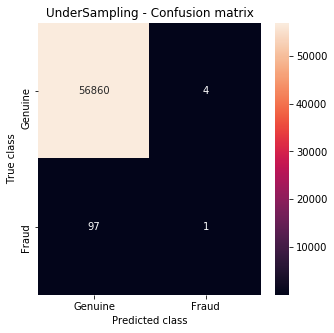

In [19]:
#Visualization of Confusion matrix
LABELS = ['Genuine', 'Fraud']
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('UnderSampling - Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [20]:
conf_mx = confusion_matrix(y_test,y_pred)
print(conf_mx)
acc= accuracy_score(y_test,y_pred)
print('The accuracy is {}'.format(acc))
prec= precision_score(y_test,y_pred)
print('The precision is {}'.format(prec))
rec= recall_score(y_test,y_pred)
print('The recall is {}'.format(rec))
f1= f1_score(y_test,y_pred)
print('The F1-Score is {}'.format(f1))

[[56860     4]
 [   97     1]]
The accuracy is 0.9982268881008391
The precision is 0.2
The recall is 0.01020408163265306
The F1-Score is 0.019417475728155335


RANDOM OVERSAMPLING TECHNIQUE
--

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=42)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (227845, 30)
y_train -  (227845,)
X_test -  (56962, 30)
y_test -  (56962,)


In [23]:
# Oversampling only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

ros = RandomOverSampler(random_state=random_state)
X_res, y_res = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227451})
X_train -  (454902, 30)
y_train -  (454902,)
X_test -  (56962, 30)
y_test -  (56962,)


In [24]:
#Over Sampling with Isolation Forest
model = IsolationForest(max_samples=len(X_train),contamination=outlier_fraction,random_state=1)
model.fit(X_train,y_train)
scores1_pred = model.decision_function(X_train)
y_pred = model.predict(X_test)
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
errors = (y_pred != y_test).sum()
print(errors)

147


[[56813    51]
 [   96     2]]


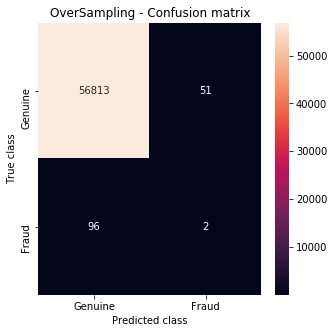

In [25]:
#Visualization of Confusion matrix
LABELS = ['Genuine', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('OverSampling - Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [26]:
conf_mx = confusion_matrix(y_test,y_pred)
print(conf_mx)
acc= accuracy_score(y_test,y_pred)
print('The accuracy is {}'.format(acc))
prec= precision_score(y_test,y_pred)
print('The precision is {}'.format(prec))
rec= recall_score(y_test,y_pred)
print('The recall is {}'.format(rec))
f1= f1_score(y_test,y_pred)
print('The F1-Score is {}'.format(f1))

[[56813    51]
 [   96     2]]
The accuracy is 0.9974193321863699
The precision is 0.03773584905660377
The recall is 0.02040816326530612
The F1-Score is 0.02649006622516556


SMOTE TECHNIQUE
------------------------------------------------------------------------


In [27]:
from imblearn.over_sampling import SMOTE, ADASYN

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=42)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (227845, 30)
y_train -  (227845,)
X_test -  (56962, 30)
y_test -  (56962,)


In [29]:
#SMOTE on train dataset
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227451})
X_train -  (454902, 30)
y_train -  (454902,)
X_test -  (56962, 30)
y_test -  (56962,)


In [30]:
model = IsolationForest(max_samples=len(X_train),contamination=outlier_fraction,random_state=1)
model.fit(X_train,y_train)
scores1_pred = model.decision_function(X_train)
y_pred = model.predict(X_test)
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
errors = (y_pred != y_test).sum()
print(errors)

157


[[56803    61]
 [   96     2]]


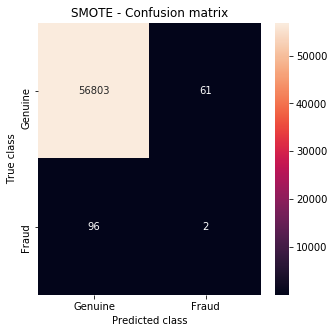

In [31]:
#Visualization of Confusion matrix
LABELS = ['Genuine', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('SMOTE - Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [32]:
conf_mx = confusion_matrix(y_test,y_pred)
print(conf_mx)
acc= accuracy_score(y_test,y_pred)
print('The accuracy is {}'.format(acc))
prec= precision_score(y_test,y_pred)
print('The precision is {}'.format(prec))
rec= recall_score(y_test,y_pred)
print('The recall is {}'.format(rec))
f1= f1_score(y_test,y_pred)
print('The F1-Score is {}'.format(f1))

[[56803    61]
 [   96     2]]
The accuracy is 0.9972437765527896
The precision is 0.031746031746031744
The recall is 0.02040816326530612
The F1-Score is 0.024844720496894408


ADASYN TECHNIQUE
--

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=42)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (227845, 30)
y_train -  (227845,)
X_test -  (56962, 30)
y_test -  (56962,)


In [34]:
#ADASYN on train dataset
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227373})
X_train -  (454824, 30)
y_train -  (454824,)
X_test -  (56962, 30)
y_test -  (56962,)


In [35]:
model = IsolationForest(max_samples=len(X_train),contamination=outlier_fraction,random_state=1)
model.fit(X_train,y_train)
scores1_pred = model.decision_function(X_train)
y_pred = model.predict(X_test)
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
errors = (y_pred != y_test).sum()
print(errors)

152


[[56807    57]
 [   95     3]]


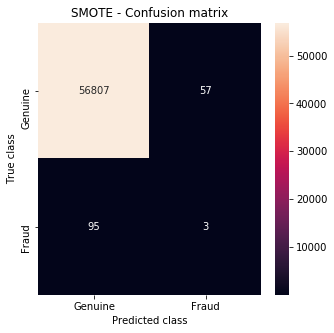

In [36]:
#Visualization of Confusion matrix
LABELS = ['Genuine', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('SMOTE - Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [37]:
conf_mx = confusion_matrix(y_test,y_pred)
print(conf_mx)
acc= accuracy_score(y_test,y_pred)
print('The accuracy is {}'.format(acc))
prec= precision_score(y_test,y_pred)
print('The precision is {}'.format(prec))
rec= recall_score(y_test,y_pred)
print('The recall is {}'.format(rec))
f1= f1_score(y_test,y_pred)
print('The F1-Score is {}'.format(f1))

[[56807    57]
 [   95     3]]
The accuracy is 0.9973315543695798
The precision is 0.05
The recall is 0.030612244897959183
The F1-Score is 0.037974683544303806


HYBRID SAMPLING
---

In [48]:

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=42)
print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=random_state)
X_res, y_res = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

rus = RandomUnderSampler(random_state=random_state)
X_res, y_res = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

model = IsolationForest(max_samples=len(X_train),contamination=outlier_fraction,random_state=1)
model.fit(X_train,y_train)
scores1_pred = model.decision_function(X_train)
y_pred = model.predict(X_test)
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
errors = (y_pred != y_test).sum()
print(errors)

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227451})
Resampled dataset shape Counter({0: 227451, 1: 227451})
147


[[56813    51]
 [   96     2]]


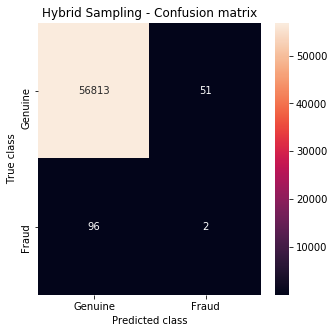

In [49]:
#Visualization of Confusion matrix
LABELS = ['Genuine', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Hybrid Sampling - Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [46]:
conf_mx = confusion_matrix(y_test,y_pred)
print(conf_mx)
acc= accuracy_score(y_test,y_pred)
print('The accuracy is {}'.format(acc))
prec= precision_score(y_test,y_pred)
print('The precision is {}'.format(prec))
rec= recall_score(y_test,y_pred)
print('The recall is {}'.format(rec))
f1= f1_score(y_test,y_pred)
print('The F1-Score is {}'.format(f1))

[[56813    51]
 [   96     2]]
The accuracy is 0.9974193321863699
The precision is 0.03773584905660377
The recall is 0.02040816326530612
The F1-Score is 0.02649006622516556
